# Descrição do Experimento

Algoritmo Genético utilizando representação binária do cromossomo. O valor zero representa que o vértice não participa da solução e o valor um, por outro lado, participa.

O tamanho do cromossomo é igual ao número de vértices não obrigatórios da instância do problema considerada (dataset), ou seja, é igual o número total de vértices subtraido a quantidade de vértices terminais.

Operação de cruzamento baseada em dois pontos de corte escolhidos aleatoriamente para cada chamada do método.
Foi utilizada a operação de mutação *bit flip*.

Para todas as instâncias do problema foram utilizados os parâmetros:

    - Nro. de execuções = 30
    - Tamanho população = 100
    - Taxa de cruzamento = 0.85
    - Taxa de mutação = 0.2
    - A inicialização da população é puramente aleatória.
    
    - Critério de parada: atingir o número máximo de iterações.
        - Atingir o número máximo de iterações: 10.000
        - Estagnação: não apresenta melhora do fitness nas últimas 500 gerações.
        - Atingir o máximo global previsto.
   
Veja implementação [check_stop_criterions](https://github.com/GiliardGodoi/ppgi-steiner-tree-gpx/blob/fb1801c118c6c51b2b874c2111975f43ffa8b509/ga_binary.py#L418)

O código da simulação se refere ao seguinte [*commit*](https://github.com/GiliardGodoi/ppgi-steiner-tree-gpx/tree/fb1801c118c6c51b2b874c2111975f43ffa8b509)

As instâncias consideradas se referem aos da classe B (steinb1.txt ... steinb18.txt) da OR-Library.

Trata-se de uma análise exploratória dos dados gerados no qual tentou se responder algumas perguntas:

    1. Convergência: quantidade de gerações;
    2. Frequência das soluções ótimas;
    3. Tempo de execução;
    4. Soluções que sofreram penalização.

In [1]:
# CONFIGURAÇÕES INICIAIS DO NOTEBOOK
import os

# Importando bibliotecas para análise de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização dos dados
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
## Carregando os dados sobre as simulações [simulation.csv]

In [3]:
MAIN_FOLDER = os.path.join("..", "outputdata", "20200330_kapsalis_random")
 
# simulations_folder: diretórios que contem os dados para cada um dos datasets.
# ['B1', 'B2', 'B3' ... ]
simulations_folder = os.listdir(MAIN_FOLDER)

assert os.path.exists(MAIN_FOLDER) == True, 'Please, check MAIN_FOLDER path'
assert len(simulations_folder) == 18, "Please, check how many simulations are"

# ARQUIVO PRINCIPAL: INDICA QUAL DADOS ESTAMOS ANALISANDO.
# Cada execução (trial) gera um arquivo diferente. 
# all_files: é um array com o nome dos trinta  arquivos
all_files = ["trial_{0}_simulation.csv".format(i) for i in range(1,31)]

#all_data_pieces: contém os DataFrames para cada um dos 30 arquivos (trials) dos 18 datasets 
all_data_pieces = list()

for folder in simulations_folder:    
    for file in all_files:
        df = pd.read_csv(os.path.join(MAIN_FOLDER, folder, file))
        all_data_pieces.append(df)

# concatena (junta) todos os DataFrames em um só
df_data = pd.concat(all_data_pieces, ignore_index=True)
        
del all_data_pieces
del df

df_data.head()

,nro_trial,instance_problem,nro_nodes,nro_edges,nro_terminals,tx_crossover,tx_mutation,global_optimum,best_cost,best_fitness,population_size,max_generation,iterations,run_time,max_last_improvement,why_stopped
0,1,B1,50,63,9,0.85,0.2,82,85,410,100,10000,741,66.162495,500,stagnation
1,2,B1,50,63,9,0.85,0.2,82,84,291,100,10000,959,60.729615,500,stagnation
2,3,B1,50,63,9,0.85,0.2,82,83,308,100,10000,1339,76.604051,500,stagnation
3,4,B1,50,63,9,0.85,0.2,82,85,203,100,10000,1528,85.964846,500,stagnation
4,5,B1,50,63,9,0.85,0.2,82,82,218,100,10000,498,29.327297,500,global_optimum_reached


In [4]:
# Algumas funções da biblioteca seaborn (sns) possui um parâmetro para determinarmos a ordem que 
# atributos categóricos serão plotados em um dos exios (x ou y) do gráfico
# categorial_order é para garantir que os dados serão plotados na mesma ordem
# [B1, B2, B3, ... B17, B18]

# Sem esse parâmetro os dados seriam plotados na ordem alfabética das strings do atributo instance_problem
# [B1, B11, B12 ... B17, B18, B2, B3, ... B9 ] o que não é desejável.

categorical_order = ["B{0}".format(i) for i in range(1,19)]

## Análise Exploratória dos Dados

A análise realizada aqui se refere aos dados do arquivo `trial_{0}_simulation.csv`

As análises referem ao variação do melhor custo encontrado, iterações executadas e critério de parada satisfeito. 

Em um segundo momento é feito uma análise desses mesmos fatores considerando as razões de parada do GA em separado.


### Variação do melhor custo atingido (best_cost)

In [5]:
df = df_data[["instance_problem", "best_cost"]].groupby("instance_problem").describe()
df.loc[categorical_order]

best_cost                                              \
                     count        mean       std    min     25%    50%   
instance_problem                                                         
B1                    30.0   84.533333  2.129163   82.0   83.00   85.0   
B2                    30.0   84.166667  2.379269   83.0   83.00   83.0   
B3                    30.0  138.000000  0.000000  138.0  138.00  138.0   
B4                    30.0   63.400000  1.940494   59.0   63.00   63.5   
B5                    30.0   61.933333  0.739680   61.0   61.25   62.0   
B6                    30.0  122.133333  0.507416  122.0  122.00  122.0   
B7                    30.0  126.766667  7.290444  115.0  122.00  127.0   
B8                    30.0  108.600000  2.823546  104.0  107.00  108.5   
B9                    30.0  220.633333  0.999425  220.0  220.00  220.0   
B10                   30.0   95.433333  4.446489   86.0   93.25   95.0   
B11                   30.0   97.366667  2.999808   91.0   95.00   97.0   
B12                   30.0  174.100000  0.305129  174.0  174.00  174.0   
B13                   30.0  193.133333  7.864075  181.0  186.25  193.0   
B14                   30.0  244.833333  3.742425  240.0  242.00  243.5   
B15                   30.0  321.900000  2.249138  318.0  320.00  322.0   
B16                   30.0  150.000000  6.685032  135.0  148.00  149.0   
B17                   30.0  137.166667  2.865771  132.0  135.00  136.0   
B18                   30.0  218.766667  0.568321  218.0  218.00  219.0   

                                 
                     75%    max  
instance_problem                 
B1                 85.75   91.0  
B2                 83.00   92.0  
B3                138.00  138.0  
B4                 64.00   67.0  
B5                 62.00   64.0  
B6                122.00  124.0  
B7                130.00  150.0  
B8                109.75  116.0  
B9                221.00  224.0  
B10                97.75  112.0  
B11                99.75  103.0  
B12               174.00  175.0  
B13               196.75  212.0  
B14               247.75  253.0  
B15               323.75  327.0  
B16               153.75  167.0  
B17               139.00  144.0  
B18               219.00  220.0

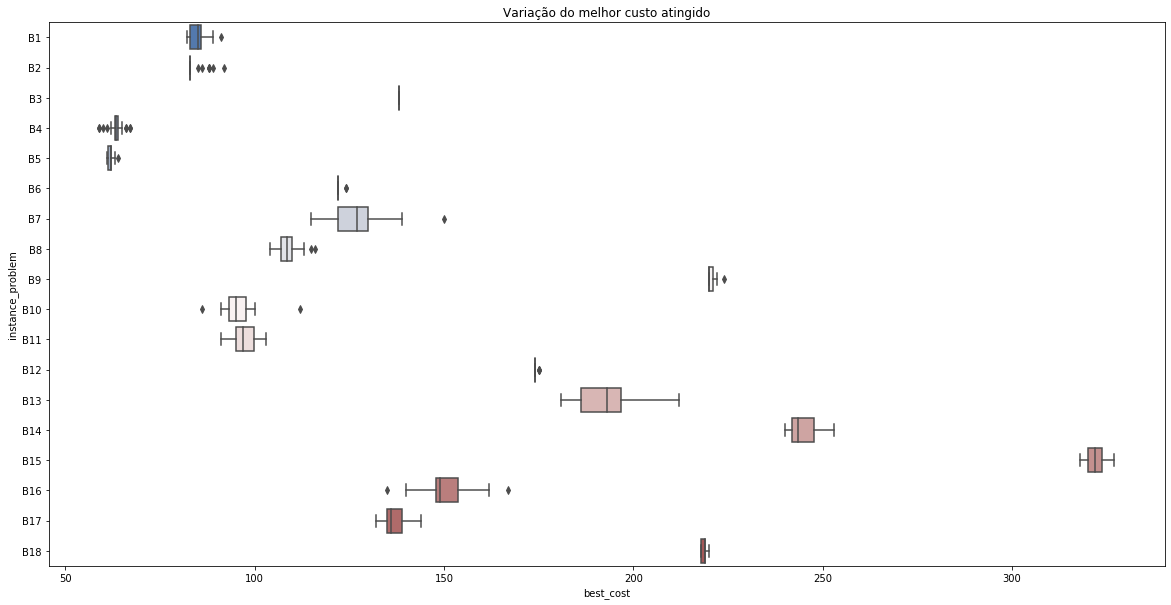

In [6]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação do melhor custo atingido')
# sns.set(style="darkgrid")

sns.boxplot(x="best_cost", 
            y="instance_problem",
            data=df_data,
            order=categorical_order,
            palette="vlag",
           )

# sns.swarmplot(x="best_cost", 
#               y="instance_problem",
#               data=df_data,
#               order=categorical_order,
#               size=2,
#               color=".3",
#               linewidth=0
#              )

### Variação do número de gerações (iterações)

In [7]:
df = df_data[["instance_problem", "iterations"]].groupby("instance_problem").describe()
df.loc[categorical_order]

iterations                                                   \
                      count         mean         std    min      25%     50%   
instance_problem                                                               
B1                     30.0  1116.333333  446.472638  239.0   826.75  1073.0   
B2                     30.0   738.133333  286.651505  231.0   587.50   702.5   
B3                     30.0    84.666667   49.979536   29.0    55.25    69.5   
B4                     30.0  1008.900000  350.961079  636.0   738.25   874.5   
B5                     30.0   753.500000  251.762580  122.0   583.25   745.5   
B6                     30.0   278.333333  201.359232   20.0   128.00   219.0   
B7                     30.0  1364.366667  399.665505  709.0  1067.75  1252.0   
B8                     30.0  1203.200000  327.587461  710.0  1001.25  1159.0   
B9                     30.0   606.600000  305.108415  130.0   370.50   610.0   
B10                    30.0  1180.466667  301.095441  597.0   936.25  1192.0   
B11                    30.0  1139.600000  385.510910  743.0   843.50   963.0   
B12                    30.0   407.733333  220.470333   91.0   231.25   385.0   
B13                    30.0  1505.000000  409.119070  830.0  1224.25  1506.5   
B14                    30.0  1449.300000  348.639835  831.0  1271.75  1413.5   
B15                    30.0  1227.766667  357.442803  649.0   963.25  1214.5   
B16                    30.0  1461.900000  383.803322  905.0  1201.50  1405.0   
B17                    30.0  1331.033333  297.289535  899.0  1121.25  1290.0   
B18                    30.0   753.433333  234.972146  200.0   640.25   786.0   

                                   
                      75%     max  
instance_problem                   
B1                1373.00  2015.0  
B2                 985.50  1211.0  
B3                  88.50   234.0  
B4                1136.75  1865.0  
B5                 957.50  1222.0  
B6                 424.00   746.0  
B7                1644.50  2539.0  
B8                1340.50  2019.0  
B9                 817.50  1280.0  
B10               1389.00  1753.0  
B11               1352.75  2055.0  
B12                538.75   942.0  
B13               1743.50  2459.0  
B14               1600.00  2546.0  
B15               1393.75  2093.0  
B16               1713.00  2348.0  
B17               1521.00  1956.0  
B18                848.75  1155.0

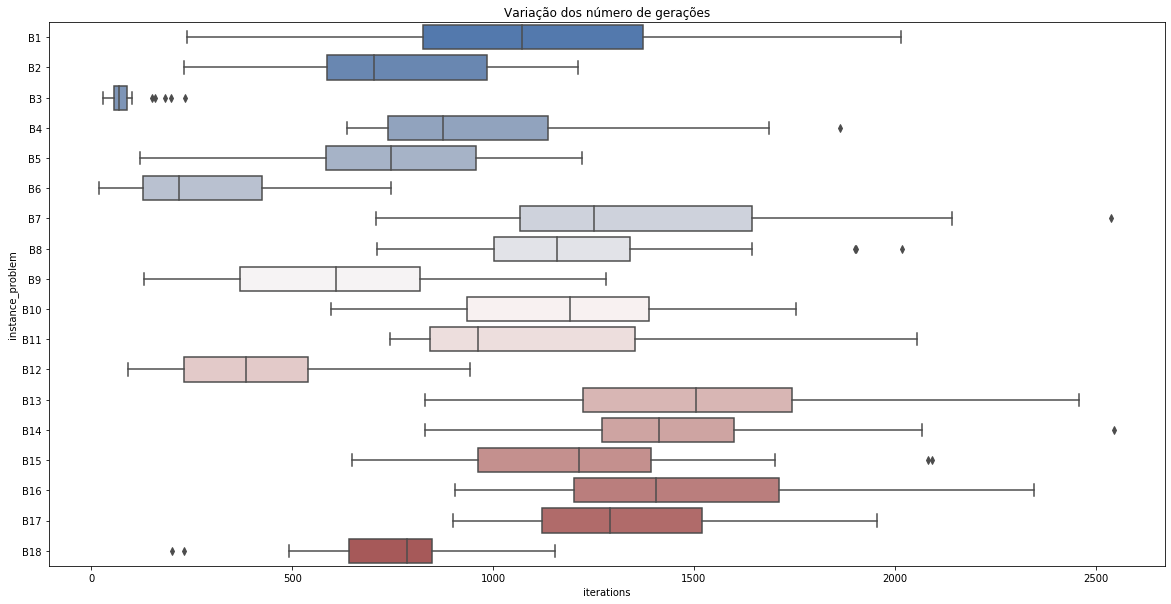

In [8]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação dos número de gerações')
# sns.set(style="darkgrid")

sns.boxplot(x="iterations", 
            y="instance_problem",
            data=df_data,
            order=categorical_order,
            palette="vlag",
           )

---

## Análise das razões de parada

Primeiro é calculada a frequência das soluções ótimas (que atingiram o máximo global) em relação àquelas que pararam por estagnação.

Não foram observados casos onde a parada se deu por atingir o número total de iterações.

In [9]:
df_data["why_stopped"].value_counts()

stagnation                384
global_optimum_reached    156
Name: why_stopped, dtype: int64

In [10]:
# Analisando o número de iterações para as execuções que terminaram por estagnação.

df_data["why_stopped"].unique()

array(['stagnation', 'global_optimum_reached'], dtype=object)

### Frequência das soluções ótimas

In [11]:
# Definir uma coluna para calcular a frequência relativa
df_data["freq"] = 0

# 1. Selecionar as colunas de interesse somente.
# 2. Os atributos (colunas) se referem a variáveis categóricas.
# 3. Realizamos uma operação de agregação (groupby) e então uma contagem
# Essa contagem será armazenada na coluna 'freq' - temos a frequência absoluta
df = df_data[["instance_problem", "why_stopped", "freq"]].groupby(["instance_problem", "why_stopped"]).count()

# A frequência relativa pode ser calculada da sequinte maneira.
# 30 se refere ao número de execuções (trial). round é utilizado para arrendondar o valor
df["freq"] = round((df["freq"] / 30) * 100, ndigits=2)

# A operação de agregação (groupby) transforma as colunas 'instance_problem' e 'why_stopped'
# em indices. Vamos desfazer isso para redimensionar a tabela
df = df.reset_index()

# A tabela resultante possui o formato
# ["instance_problem", "why_stopped", "freq"]
# df.head()

# 
df_stopped = df.pivot(index="instance_problem", 
                     columns="why_stopped",
                     values="freq"
                    )
# Algumas instâncias do problema obtiveram 100% dos trials
# para um determinado critério de parada. O outro valor foi definido como NaN
# vamos substituir NaN por 0
df_stopped.fillna(0, inplace=True)

# Apresentando os dados
# <utilizar categorical_order para apresentar os dados segundo a ordem desejada.
df_stopped.loc[categorical_order]

why_stopped,global_optimum_reached,stagnation
instance_problem,,
B1,20.00,80.00
B2,76.67,23.33
B3,100.00,0.00
B4,6.67,93.33
B5,26.67,73.33
B6,93.33,6.67
B7,0.00,100.00
B8,6.67,93.33
B9,63.33,36.67


<Figure size 1440x720 with 0 Axes>

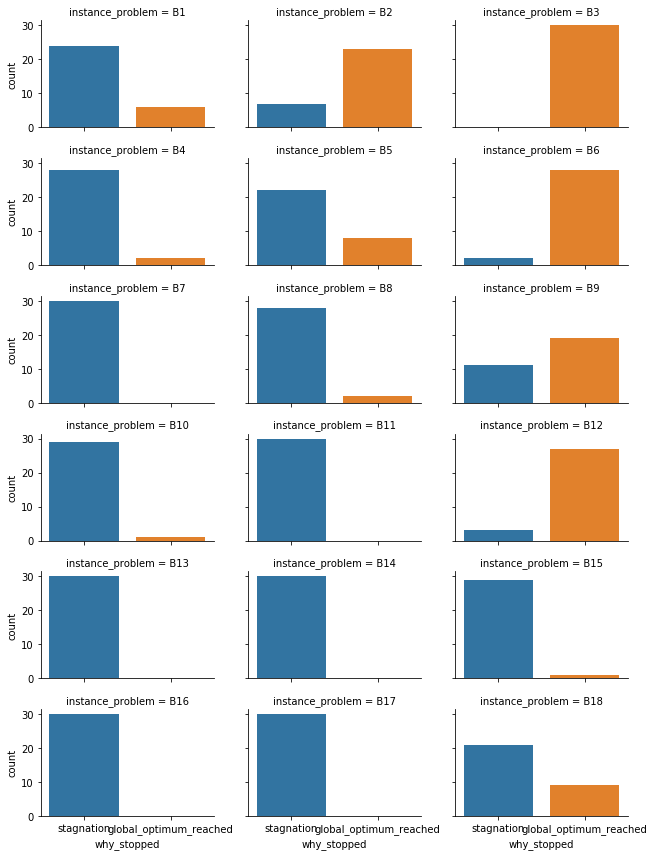

In [12]:
fig = plt.figure(figsize=(20, 10))

grid = sns.catplot("why_stopped", 
                   col="instance_problem",
                   col_wrap=3,
                   data=df_data,
                   kind="count",
                   col_order=categorical_order,
                   height=2,
                   aspect=1.5)

## Análise para as execuções que pararam por estagnação.

Nesta parte são analisados os dados das execuções que pararam por estagnação, isto é, não melhoraram o máximo global após 500 gerações.

In [13]:
# Selecionando os registros de interesse
df_stagnation = df_data[df_data["why_stopped"] == "stagnation" ]

df_stagnation.columns

Index(['nro_trial', 'instance_problem', 'nro_nodes', 'nro_edges',
       'nro_terminals', 'tx_crossover', 'tx_mutation', 'global_optimum',
       'best_cost', 'best_fitness', 'population_size', 'max_generation',
       'iterations', 'run_time', 'max_last_improvement', 'why_stopped',
       'freq'],
      dtype='object')

In [14]:
# A instância B3 atingiu o máximo global em todas as execuções.
# então essa instância não irá aparecer aqui em df.
# para evitar o erro e ordenar é necessário fazer essa gambiarra
custom_categorical_order = categorical_order[:]
custom_categorical_order.remove("B3")

### Variação da melhor solução encontrada até a parada

In [15]:
df = df_stagnation[["instance_problem", "best_cost"]].groupby("instance_problem").describe()
df.loc[custom_categorical_order]

best_cost                                              \
                     count        mean       std    min     25%    50%   
instance_problem                                                         
B1                    24.0   85.166667  1.903467   83.0   84.00   85.0   
B2                     7.0   88.000000  2.236068   85.0   87.00   88.0   
B4                    28.0   63.714286  1.583647   60.0   63.00   64.0   
B5                    22.0   62.272727  0.550482   62.0   62.00   62.0   
B6                     2.0  124.000000  0.000000  124.0  124.00  124.0   
B7                    30.0  126.766667  7.290444  115.0  122.00  127.0   
B8                    28.0  108.928571  2.623661  105.0  107.00  109.0   
B9                    11.0  221.727273  0.904534  221.0  221.00  222.0   
B10                   29.0   95.758621  4.146041   91.0   94.00   95.0   
B11                   30.0   97.366667  2.999808   91.0   95.00   97.0   
B12                    3.0  175.000000  0.000000  175.0  175.00  175.0   
B13                   30.0  193.133333  7.864075  181.0  186.25  193.0   
B14                   30.0  244.833333  3.742425  240.0  242.00  243.5   
B15                   29.0  322.034483  2.162716  319.0  320.00  322.0   
B16                   30.0  150.000000  6.685032  135.0  148.00  149.0   
B17                   30.0  137.166667  2.865771  132.0  135.00  136.0   
B18                   21.0  219.095238  0.300793  219.0  219.00  219.0   

                                 
                     75%    max  
instance_problem                 
B1                 86.00   91.0  
B2                 88.50   92.0  
B4                 64.00   67.0  
B5                 62.00   64.0  
B6                124.00  124.0  
B7                130.00  150.0  
B8                110.00  116.0  
B9                222.00  224.0  
B10                98.00  112.0  
B11                99.75  103.0  
B12               175.00  175.0  
B13               196.75  212.0  
B14               247.75  253.0  
B15               324.00  327.0  
B16               153.75  167.0  
B17               139.00  144.0  
B18               219.00  220.0

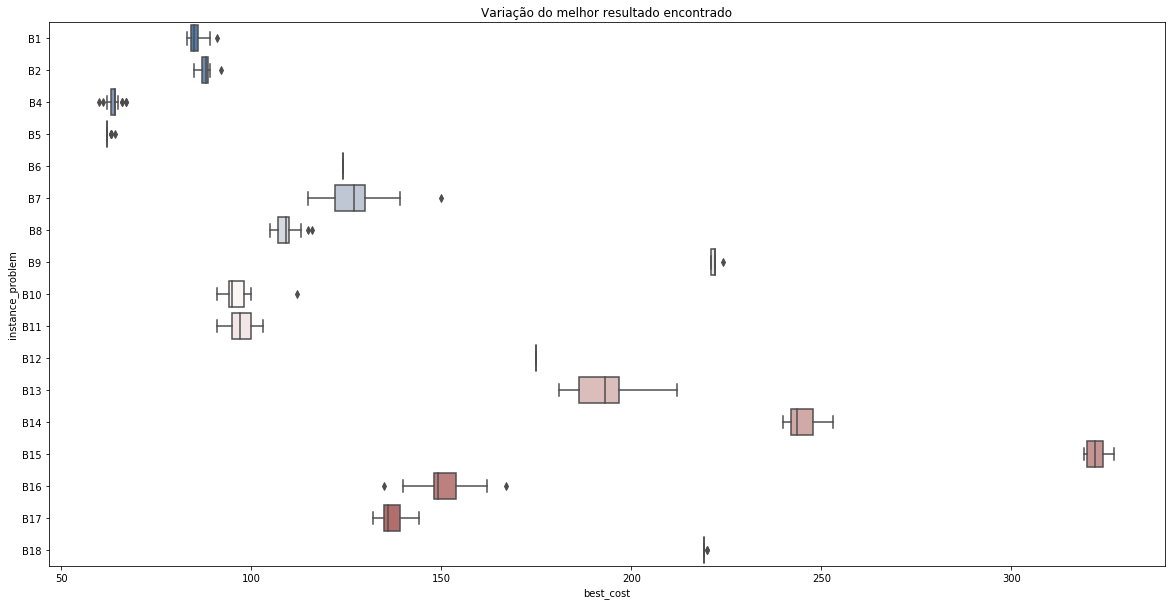

In [16]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação do melhor resultado encontrado')
# sns.set(style="darkgrid")

sns.boxplot(x="best_cost", 
            y="instance_problem",
            data=df_stagnation,
            order=custom_categorical_order,
            palette="vlag",
           )

### Variação do número de iterações

In [17]:
## ESTATÍSTICAS ELEMENTARES para o número de iterações

df = df_stagnation[["instance_problem", "iterations"]].groupby("instance_problem").describe()
df.loc[custom_categorical_order]

iterations                                                   \
                      count         mean         std    min      25%     50%   
instance_problem                                                               
B1                     24.0  1200.958333  348.353329  682.0   949.00  1198.5   
B2                      7.0   904.571429  147.275091  702.0   804.00   941.0   
B4                     28.0  1010.035714  363.552786  636.0   735.50   866.5   
B5                     22.0   842.045455  195.579354  557.0   696.00   800.5   
B6                      2.0   628.500000   21.920310  613.0   620.75   628.5   
B7                     30.0  1364.366667  399.665505  709.0  1067.75  1252.0   
B8                     28.0  1234.857143  315.417385  843.0  1022.25  1174.0   
B9                     11.0   863.181818  204.220380  575.0   763.00   824.0   
B10                    29.0  1165.620690  295.039031  597.0   936.00  1181.0   
B11                    30.0  1139.600000  385.510910  743.0   843.50   963.0   
B12                     3.0   745.333333  186.915311  570.0   647.00   724.0   
B13                    30.0  1505.000000  409.119070  830.0  1224.25  1506.5   
B14                    30.0  1449.300000  348.639835  831.0  1271.75  1413.5   
B15                    29.0  1245.310345  350.378683  649.0   991.00  1235.0   
B16                    30.0  1461.900000  383.803322  905.0  1201.50  1405.0   
B17                    30.0  1331.033333  297.289535  899.0  1121.25  1290.0   
B18                    21.0   846.666667  178.290867  574.0   683.00   815.0   

                                   
                      75%     max  
instance_problem                   
B1                1389.25  1970.0  
B2                1014.00  1053.0  
B4                1177.00  1865.0  
B5                 981.75  1222.0  
B6                 636.25   644.0  
B7                1644.50  2539.0  
B8                1366.50  2019.0  
B9                 970.00  1280.0  
B10               1362.00  1753.0  
B11               1352.75  2055.0  
B12                833.00   942.0  
B13               1743.50  2459.0  
B14               1600.00  2546.0  
B15               1395.00  2093.0  
B16               1713.00  2348.0  
B17               1521.00  1956.0  
B18               1010.00  1155.0

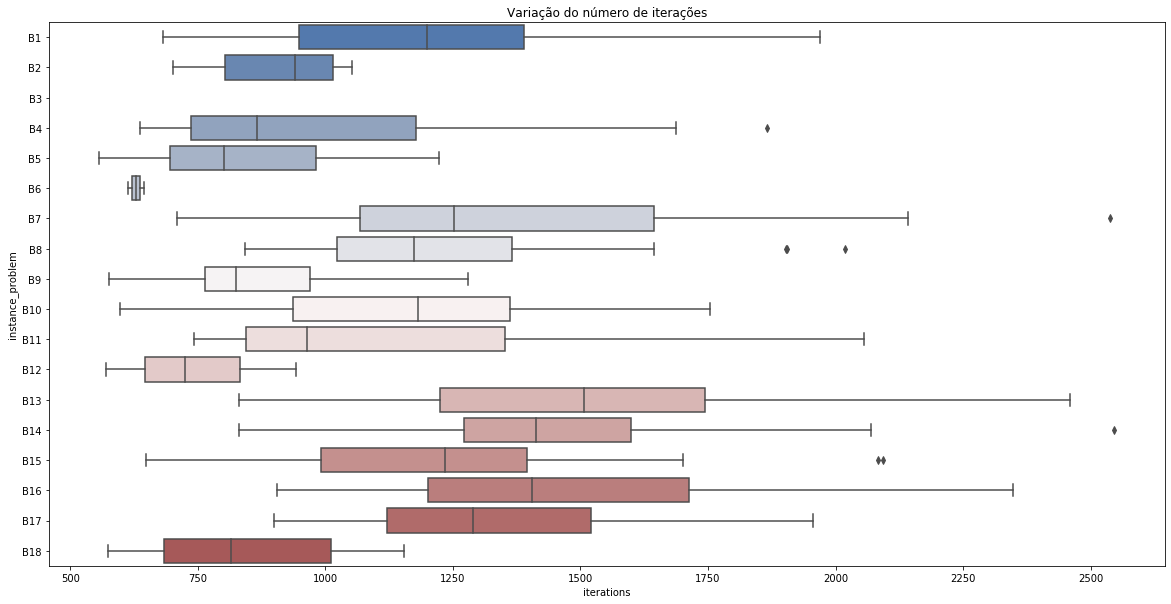

In [18]:

fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação do número de iterações')
# sns.set(style="darkgrid")

sns.boxplot(x="iterations", 
            y="instance_problem",
            data=df_stagnation,
            order=categorical_order,
            palette="vlag",
           )

### Analisando o tempo de execução em segundos

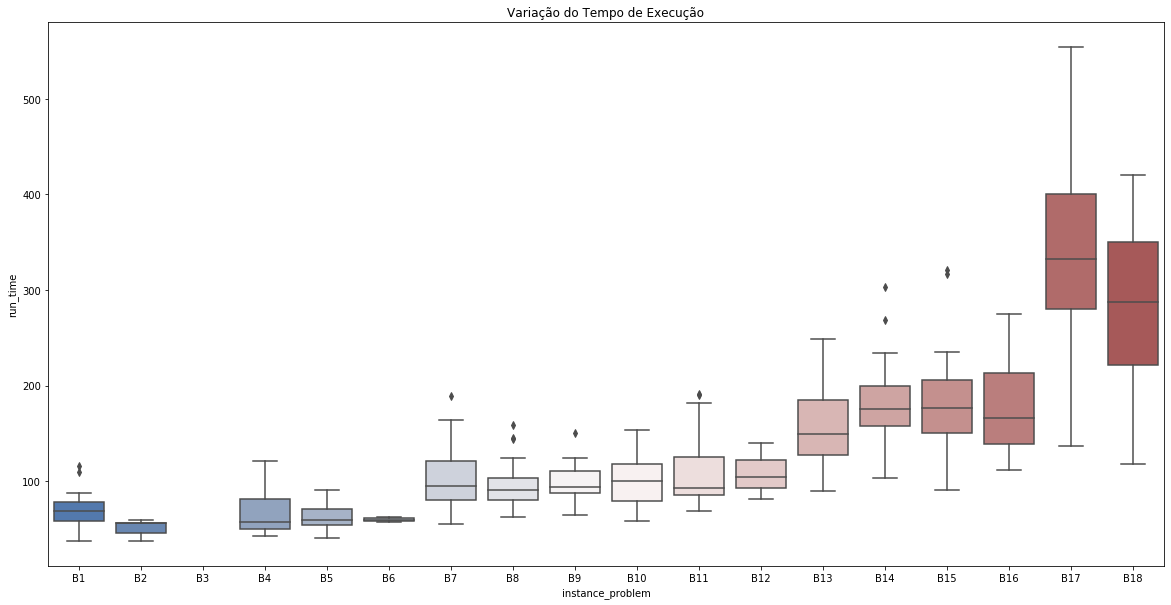

In [19]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação do Tempo de Execução')
# sns.set(style="darkgrid")

sns.boxplot(y="run_time", 
            x="instance_problem",
            data=df_stagnation,
            order=categorical_order,
            palette="vlag",
           )


---

## Análise das execuções que pararam por atingir o máximo global previsto

In [20]:
## Seleção dos dados de interesse
df_global_optimum = df_data[df_data["why_stopped"] == 'global_optimum_reached' ]

df_global_optimum.columns

Index(['nro_trial', 'instance_problem', 'nro_nodes', 'nro_edges',
       'nro_terminals', 'tx_crossover', 'tx_mutation', 'global_optimum',
       'best_cost', 'best_fitness', 'population_size', 'max_generation',
       'iterations', 'run_time', 'max_last_improvement', 'why_stopped',
       'freq'],
      dtype='object')

In [21]:
# Algumas intâncias do problema não atigiram o máximo global para nenhuma execução.
# vamos retirar essas categorias do vetor de ordenação que vai ser utilizado para 
# plotar o gráfico. Somente para fins de clareza do gráfico.

unique_values = df_global_optimum['instance_problem'].unique()

custom_categorial_order = list()

for category in categorical_order:
    if category in unique_values:
        custom_categorial_order.append(category)


In [22]:
## Obviamente a variação do melhor custo para as execuções que alcançaram o máximo global previsto 
# não apresenta resultados interessantes - uma vez que todos atingiram o mesmo resutaldo.
# mas esse cálculo é um indicativo de que o procedimento seja confiável.

df = df_global_optimum[["instance_problem", "best_cost"]].groupby("instance_problem").describe()
df.loc[custom_categorial_order]

best_cost                                               
                     count   mean  std    min    25%    50%    75%    max
instance_problem                                                         
B1                     6.0   82.0  0.0   82.0   82.0   82.0   82.0   82.0
B2                    23.0   83.0  0.0   83.0   83.0   83.0   83.0   83.0
B3                    30.0  138.0  0.0  138.0  138.0  138.0  138.0  138.0
B4                     2.0   59.0  0.0   59.0   59.0   59.0   59.0   59.0
B5                     8.0   61.0  0.0   61.0   61.0   61.0   61.0   61.0
B6                    28.0  122.0  0.0  122.0  122.0  122.0  122.0  122.0
B8                     2.0  104.0  0.0  104.0  104.0  104.0  104.0  104.0
B9                    19.0  220.0  0.0  220.0  220.0  220.0  220.0  220.0
B10                    1.0   86.0  NaN   86.0   86.0   86.0   86.0   86.0
B12                   27.0  174.0  0.0  174.0  174.0  174.0  174.0  174.0
B15                    1.0  318.0  NaN  318.0  318.0  318.0  318.0  318.0
B18                    9.0  218.0  0.0  218.0  218.0  218.0  218.0  218.0

### Variação do número de iterções para as execuções que atingiram o ótimo global

No gráfico abaixo mostra a variação do número de iterações para as execuções que atingiram o ótimo global.

Lembrar que o número de registro da presente situação é diferente (senão muito menor) dos resultados mostrados para as execuções que pararam por estagnação.

In [23]:
df = df_global_optimum[["instance_problem", "iterations"]].groupby("instance_problem").describe()
df.loc[custom_categorial_order]

iterations                                                    \
                      count         mean         std     min      25%     50%   
instance_problem                                                                
B1                      6.0   777.833333  652.744794   239.0   454.50   498.5   
B2                     23.0   687.478261  301.498963   231.0   507.50   658.0   
B3                     30.0    84.666667   49.979536    29.0    55.25    69.5   
B4                      2.0   993.000000   53.740115   955.0   974.00   993.0   
B5                      8.0   510.000000  235.446688   122.0   428.00   474.5   
B6                     28.0   253.321429  183.846767    20.0   116.75   209.5   
B8                      2.0   760.000000   70.710678   710.0   735.00   760.0   
B9                     19.0   458.052632  251.566972   130.0   248.00   437.0   
B10                     1.0  1611.000000         NaN  1611.0  1611.00  1611.0   
B12                    27.0   370.222222  192.135836    91.0   224.00   362.0   
B15                     1.0   719.000000         NaN   719.0   719.00   719.0   
B18                     9.0   535.888889  211.222894   200.0   493.00   538.0   

                                   
                      75%     max  
instance_problem                   
B1                 856.75  2015.0  
B2                 913.50  1211.0  
B3                  88.50   234.0  
B4                1012.00  1031.0  
B5                 595.25   932.0  
B6                 319.00   746.0  
B8                 785.00   810.0  
B9                 610.00   984.0  
B10               1611.00  1611.0  
B12                474.00   845.0  
B15                719.00   719.0  
B18                658.00   851.0

**Observação:** No gráfico a seguir (e na tabela anterior) as instâncias B10 e B15 não apresentam variações (desvio padrão std = NaN).

Esse resultado se deve ao fato de que essas instâncias só atingiram o máximo global em uma única execução.

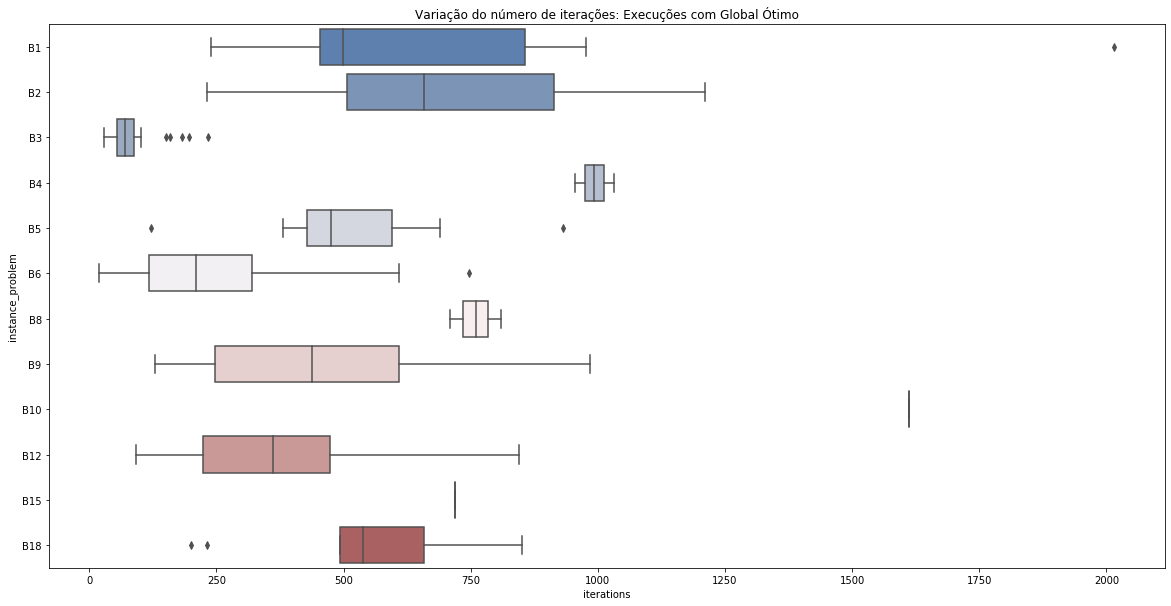

In [24]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação do número de iterações: Execuções com Global Ótimo')
# sns.set(style="darkgrid")

sns.boxplot(x="iterations", 
            y="instance_problem",
            data=df_global_optimum,
            order=custom_categorial_order,
            palette="vlag",
           )

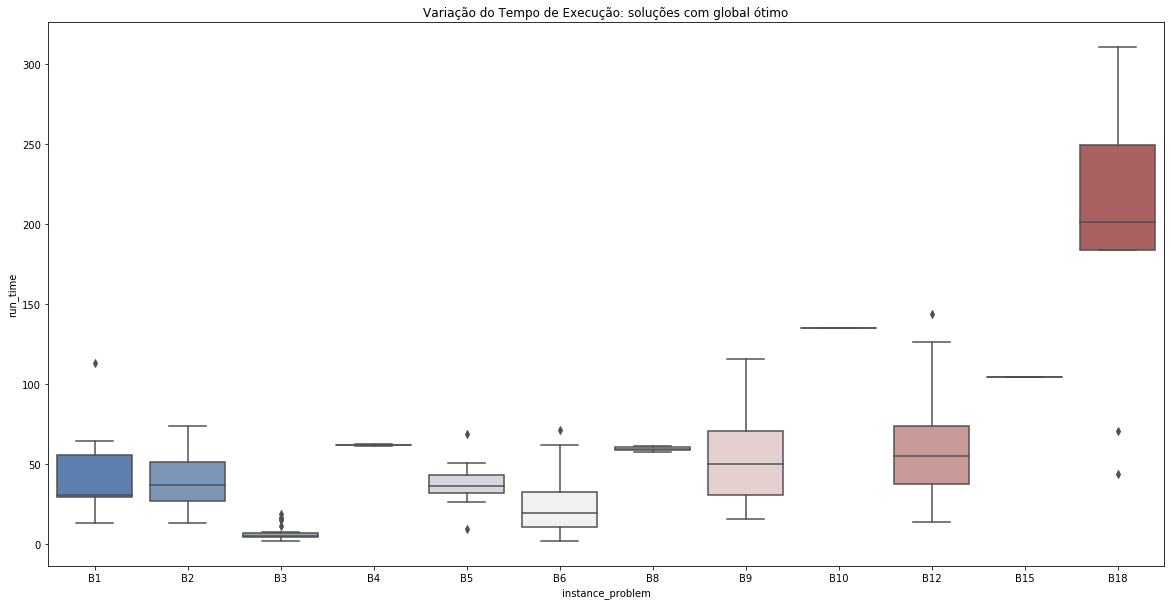

In [25]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação do Tempo de Execução: soluções com global ótimo')
# sns.set(style="darkgrid")

sns.boxplot(y="run_time", 
            x="instance_problem",
            data=df_global_optimum,
            order=custom_categorial_order,
            palette="vlag",
           )

Instâncias de problemas que apresentaram pequena variação no tempo de execução, também se deve ao fato do pequeno número de execuções que encontraram o ótimo global. Um exemplo disso são as instâncias B4, B8, B10 e B15.

A instância B3 encontrou o máximo global para todas as execuções  e mateve uma pequena variação no tempo de execução.

## Analizando o desempenho a cada iteração.

O arquivo `trial_{0}_evaluation.csv` mantém alguns dados de interesse para cada iteração de uma execução do algoritmo genético.

Os atributos são:
   - **iteration**: número da iteração (o melhor seria da geraç
   - **penalization**: quantidade de indivíduos que sofreram penalização - não mantém a média ou quantidade de penalizações.
   - **average**: fitness médio percebido durante a iteração;
   - **std_deviation**: desvio padrão do fitness na iteração.
    
O fitness, conforme abordado no trabalho original de Kapsalis (1993), é uma normalização do custo penalizado da simulação em relação ao maior custo encontrado em uma iteração, dado pela fórmula abaixo:

$$fitness_{ij} = MaxCusto_j - custo_{ij} $$



In [26]:
DATASET = "B13"

all_files = ["trial_{0}_evaluation.csv".format(i) for i in range(1,31)]
all_data_pieces = list()

for trial, filename in enumerate(all_files, start=1):
    df = pd.read_csv(os.path.join(MAIN_FOLDER, DATASET, filename))
    df['trial'] = str(trial)
    all_data_pieces.append(df)
    
df_evaluation = pd.concat(all_data_pieces)

del all_data_pieces
del df

df_evaluation.sample(5)

,iteration,penalization,average,std_deviation,trial
535,535,12,166.39,35.222495,2
330,330,10,112.00,30.831245,16
1806,1806,12,244.62,44.630872,1
516,516,5,181.80,27.160949,1
108,108,7,268.64,43.350001,25


In [27]:
df_evaluation['penalization'].describe()

count    45180.000000
mean        15.432758
std         12.950955
min          0.000000
25%          9.000000
50%         13.000000
75%         18.000000
max        100.000000
Name: penalization, dtype: float64

In [28]:
df_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45180 entries, 0 to 1491
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   iteration      45180 non-null  int64  
 1   penalization   45180 non-null  int64  
 2   average        45180 non-null  float64
 3   std_deviation  45180 non-null  float64
 4   trial          45180 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ MB


### Exemplo da variação de indivíduos penalizados em uma execução


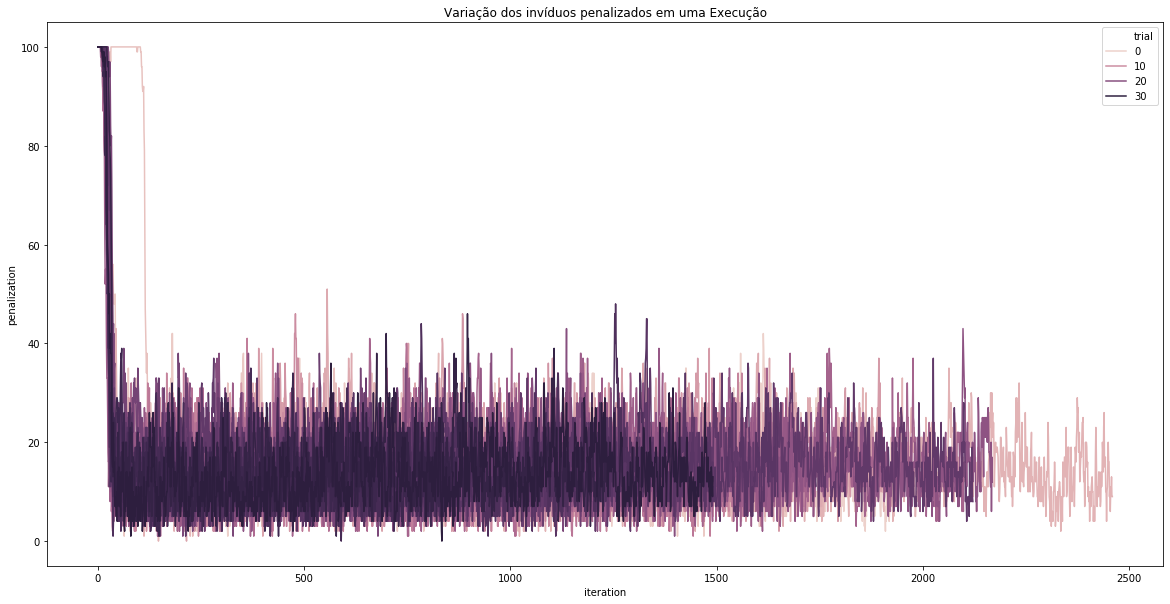

In [29]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação dos invíduos penalizados em uma Execução')

g = sns.lineplot(x="iteration",
                y="penalization",
                hue='trial',
                data=df_evaluation)

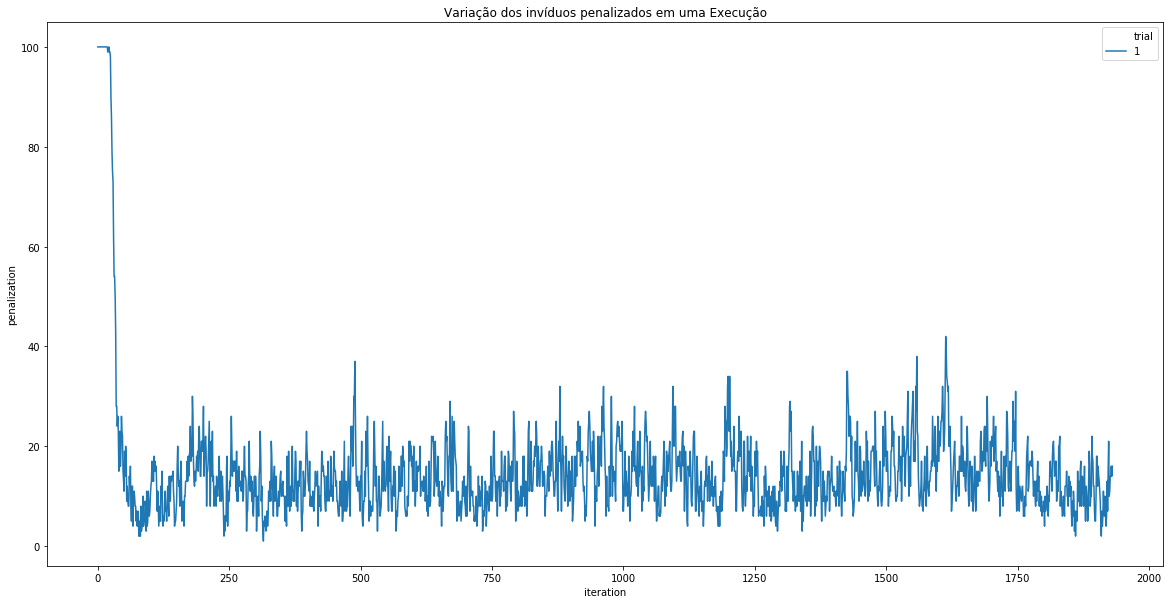

In [30]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Variação dos invíduos penalizados em uma Execução')

g = sns.lineplot(x="iteration",
                y="penalization",
                hue='trial',
                data=df_evaluation[df_evaluation["trial"] == '1'])

### Fitness médio observado em cada iteração

In [31]:
df_evaluation['average'].describe()

count    45180.000000
mean       189.621812
std         86.707544
min         24.310000
25%        159.560000
50%        176.530000
75%        203.632500
max       1505.780000
Name: average, dtype: float64

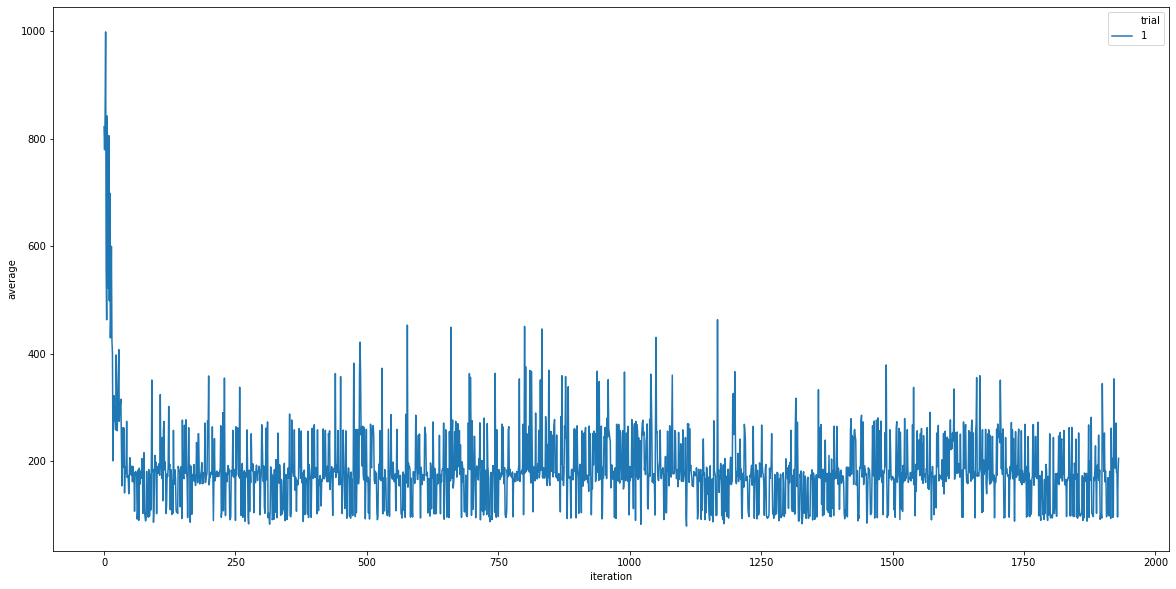

In [32]:
fig = plt.figure(figsize=(20, 10))
# plt.title(label=f'Variação dos invíduos penalizados em uma Execução')

g = sns.lineplot(x="iteration",
                y="average",
                hue='trial',
                data=df_evaluation[df_evaluation["trial"] == '1'])

## Melhor resultado de cada iteração


A cada iteração (geração) é selecionado o indivíduo que apresenta o melhor fitness e custo. 
Esse índividuo é comparado com a melhor solução já obtida (`best_chromosome`) em uma tentativa de atualizar esse valor.

Os dados analisados se referem ao arquivo base `trial_{0}_best_from_round.csv`

In [33]:
DATASET = "B13"

all_files = ["trial_{0}_best_from_round.csv".format(i) for i in range(1,31)]

all_data_pieces = list()

for trial, filename in enumerate(all_files, start=1):
    df = pd.read_csv(os.path.join(MAIN_FOLDER, DATASET, filename))
    df['trial'] = str(trial)
    all_data_pieces.append(df)
    
df_best_each_round = pd.concat(all_data_pieces)

del all_data_pieces
del df

df_best_each_round.head()

,iteration,cost,fitness,trial
0,0,900,1799,1
1,1,919,1570,1
2,2,919,1458,1
3,3,934,1471,1
4,4,642,1212,1


### Variação do melhor custo obtido a cada iteração (geração) ao longo de uma execução do GA.

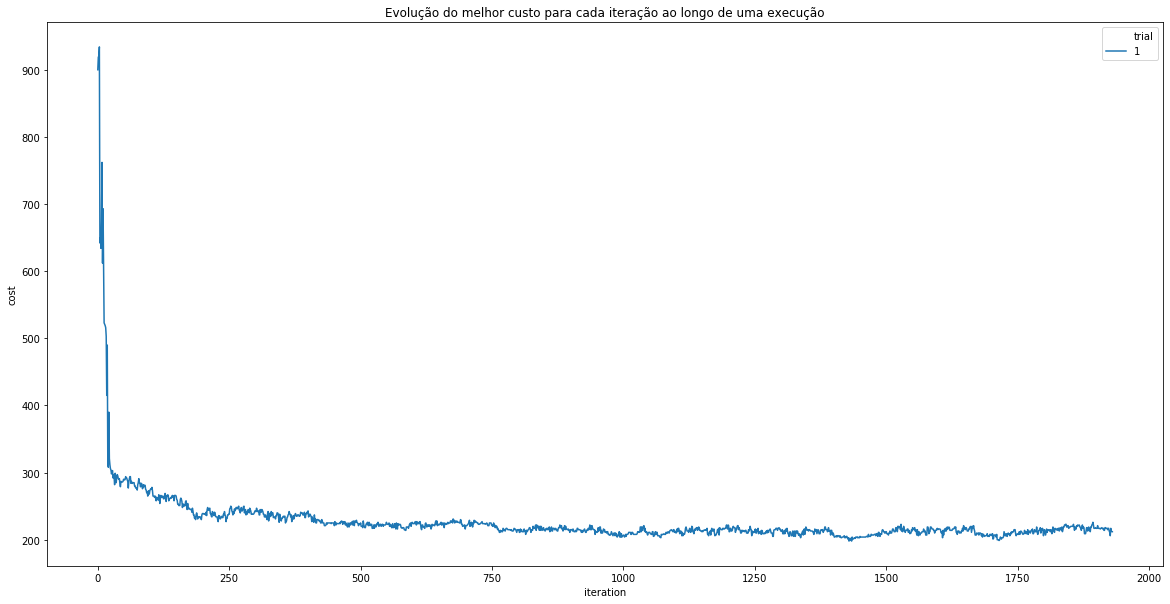

In [34]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Evolução do melhor custo para cada iteração ao longo de uma execução')

g = sns.lineplot(x="iteration",
                y="cost",
                hue='trial',
                data=df_best_each_round[df_best_each_round["trial"] == '1'])

### Variação do melhor fitness de cada iteração ao longo de uma execução do GA

Considerando que o fitness é calculado em relação a um custo máximo de cada iteração, a variação do fitness é mais errádico do que a variação do custo, conforme do exemplo anterior

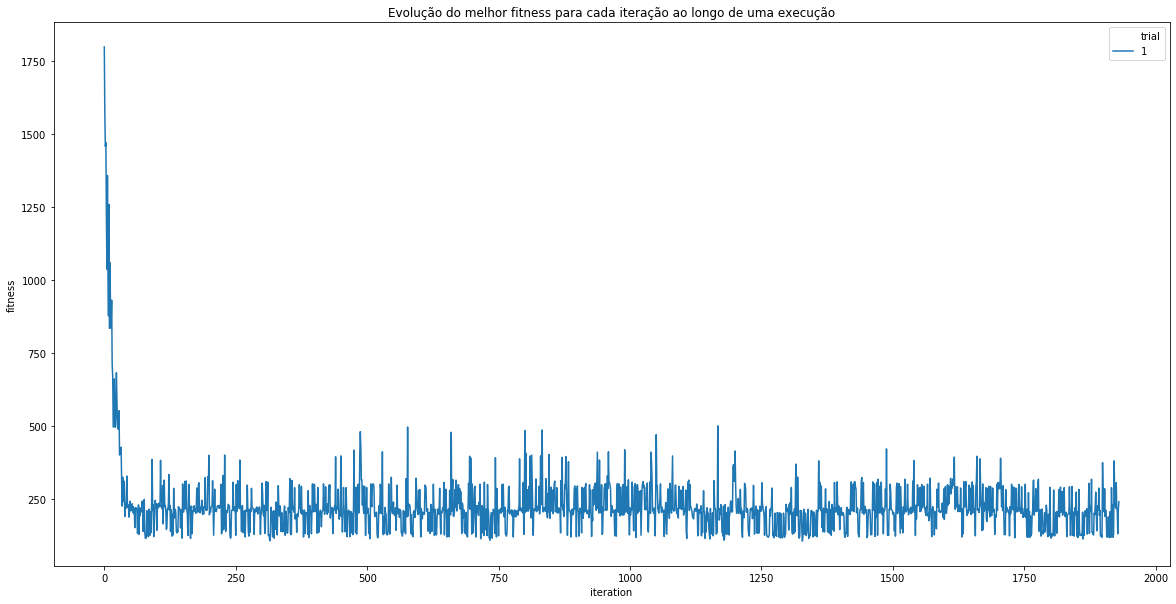

In [35]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Evolução do melhor fitness para cada iteração ao longo de uma execução')

# Lembrando que o fitness é uma normalização do custo em relação ao maior custo observado em uma iteração.
# fitness_(j i) = maior_custo_observado_j - custo_(j i)

g = sns.lineplot(x="iteration",
                y="fitness",
                hue='trial',
                data=df_best_each_round[df_best_each_round["trial"] == '1'])

## Atualização melhor do melhor custo

A cada atualização da melhor solução um registro é criado para o arquivo `trial_{0}_best_fitness.csv`.

O gráfico abaixo mostra a evolução do melhor custo global atingido ao longo de uma execução (trial).


In [36]:
DATASET = "B12"

all_files = ["trial_{0}_best_fitness.csv".format(i) for i in range(1,31)]

all_data_pieces = list()

for trial, filename in enumerate(all_files, start=1):
    df = pd.read_csv(os.path.join(MAIN_FOLDER, DATASET, filename))
    df['trial'] = str(trial)
    all_data_pieces.append(df)
    
df_bestfit = pd.concat(all_data_pieces)

del all_data_pieces
del df

df_bestfit.sample()

,iteration,cost,fitness,trial
10,56,185,111,9


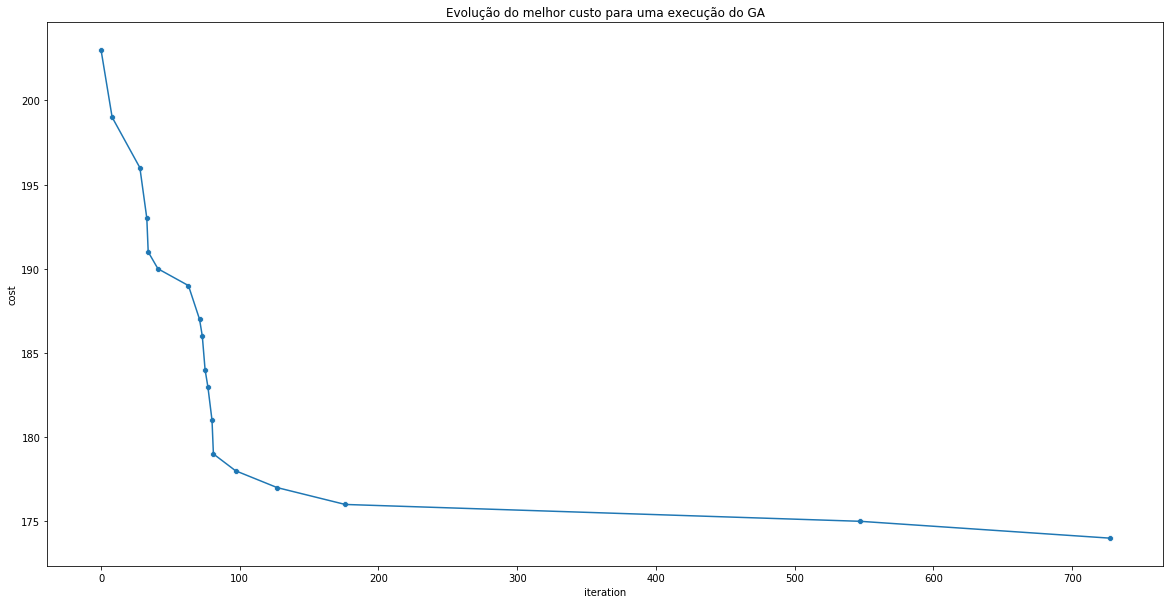

In [37]:
fig = plt.figure(figsize=(20, 10))
plt.title(label=f'Evolução do melhor custo para uma execução do GA')

g = sns.lineplot(x="iteration",
                y="cost",
                data=df_bestfit[df_bestfit["trial"] == '15'])

g = sns.scatterplot(x="iteration",
                y="cost",
                ax=g,
                data=df_bestfit[df_bestfit["trial"] == '15'])